### <span style="color:GoldenRod ">**E-Commerce Analytics**</span>

#### <span style="color:Aquamarine ">**Loading the Data**</span>

In [1]:
import pandas as pd

file_path = "F:\Internships\Labmentix\Project 1\E-Commerce Project.xlsx"
df = pd.ExcelFile(file_path)

df.sheet_names

['KPI', 'Data']

In [2]:
#Loading the Data Sheet for analysis

df = df.parse('Data')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,E-Commerce Site,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Snapdeal,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,2,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,Snapdeal,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,3,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,Flipkart,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,4,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,Flipkart,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,5,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,Snapdeal,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           10000 non-null  int64         
 1   Order ID         10000 non-null  object        
 2   Order Date       10000 non-null  datetime64[ns]
 3   Ship Date        10000 non-null  datetime64[ns]
 4   Ship Mode        10000 non-null  object        
 5   Customer ID      10000 non-null  object        
 6   Customer Name    10000 non-null  object        
 7   Segment          10000 non-null  object        
 8   City             10000 non-null  object        
 9   State            10000 non-null  object        
 10  Country          10000 non-null  object        
 11  Region           10000 non-null  object        
 12  Market           10000 non-null  object        
 13  Product ID       10000 non-null  object        
 14  E-Commerce Site  10000 non-null  object

#### <span style="color:Aquamarine ">**Exploratory Data Analysis**</span>

In [4]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
City               0
State              0
Country            0
Region             0
Market             0
Product ID         0
E-Commerce Site    0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
Shipping Cost      0
Order Priority     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2014-05-16 15:13:23.520000256,2014-05-20 06:26:47.040000512,715.879256,4.485100,0.107337,97.168921,86.162593
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1.362000,1.000000,0.000000,-4088.376000,1.040000
25%,2500.75000,2013-06-22 00:00:00,2013-06-26 00:00:00,266.220000,3.000000,0.000000,5.124300,38.013750
50%,5000.50000,2014-07-14 00:00:00,2014-07-17 00:00:00,517.408500,4.000000,0.000000,61.327800,57.390000
75%,7500.25000,2015-05-26 00:00:00,2015-05-30 00:00:00,907.011000,6.000000,0.170000,178.560000,101.232500
max,10000.00000,2015-12-31 00:00:00,2016-01-06 00:00:00,9892.740000,14.000000,0.850000,4946.370000,923.630000
std,2886.89568,NaN,NaN,726.602327,2.531485,0.167997,294.026445,94.345029


In [7]:
# Convert Date to Datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

#### <span style="color:Aquamarine ">**Identify Outliers and Handle them**</span>

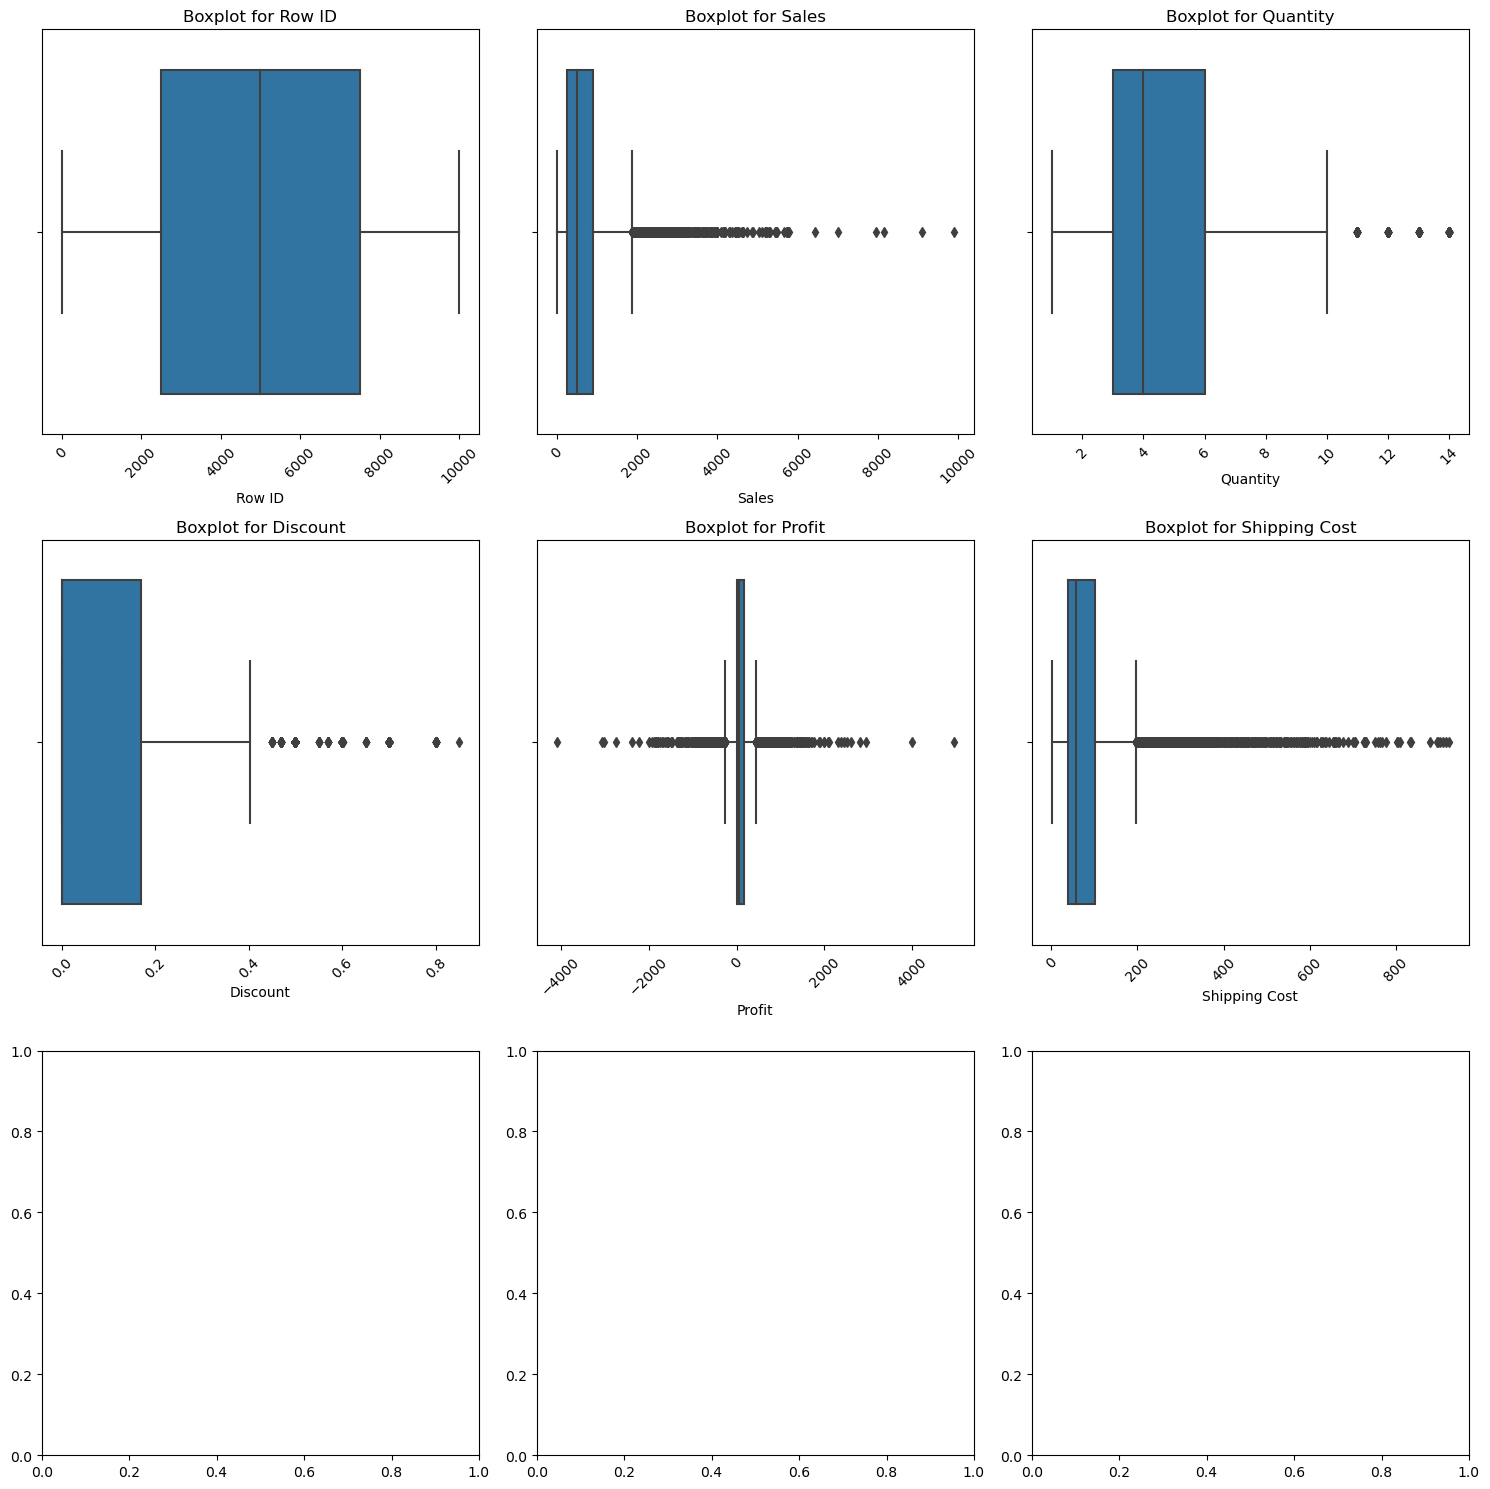

In [8]:
# Visualize Potential Outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Visualization 
fig, axes = plt.subplots(nrows=len(numeric_cols)//3+1, ncols=3, figsize=(15, 5*(len(numeric_cols)//3+1)))
axes = axes.flatten()

# Plot Box plots for each numeric columm
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# Statistical Methods for Outlier Detection: IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Detecting Outliers

outliers_mask = (df[numeric_cols] < lower_limit) | (df[numeric_cols] > upper_limit)

# Step 5: Extract Rows with Outliers
outliers_df = df[outliers_mask.any(axis=1)]  # Rows where any numeric column is an outlier
outliers_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,E-Commerce Site,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,2,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,Snapdeal,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,3,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,Flipkart,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,4,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,Flipkart,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,5,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,Snapdeal,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
5,6,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,Sydney,New South Wales,...,Amazon,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.350,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,9977,CA-2014-CK12205140-41965,2014-11-22,2014-11-27,Standard Class,CK-122051406,Chloris Kastensmidt,Consumer,Columbus,Ohio,...,Flipkart,Technology,Machines,Texas Instrument TI-15 Fraction Calculator,30.345,7,0.7,-24.2760,1.860,Medium
9984,9985,IN-2012-BS1159027-41020,2012-04-21,2012-04-24,First Class,BS-1159027,Brendan Sweed,Corporate,Yancheng,Jiangsu,...,Snapdeal,Office Supplies,Art,"Boston Highlighters, Easy-Erase",210.540,11,0.0,41.9100,32.960,Medium
9986,9987,CA-2015-CK12205140-42235,2015-08-19,2015-08-26,Standard Class,CK-122051406,Chloris Kastensmidt,Consumer,Lakewood,Ohio,...,Amazon,Office Supplies,Binders,GBC Personal VeloBind Strips,10.782,3,0.7,-7.9068,1.780,Medium
9992,9993,ES-2013-DP1316591-41355,2013-03-22,2013-03-26,Standard Class,DP-1316591,David Philippe,Consumer,Utrecht,Utrecht,...,Snapdeal,Furniture,Chairs,"Novimex Steel Folding Chair, Black",399.000,10,0.5,-263.4000,32.920,Medium


**We can observe that there are appoximately 2281 rows with outliers in our dataset. Since our dataset is very small these number of outliers can skew our anlysis**

**We can either extract a clean dataframe without any outliers from our original dataset OR we can simply flag the outliers and proceed with the analysis**

**Although these numbers could be legitimate, we will proceed with the analysis using a cleaner dataset**

In [10]:


clean_df = df[~outliers_mask.any(axis=1)] 
clean_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,E-Commerce Site,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Snapdeal,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.770,High
8,9,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Snapdeal,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,25.270,High
9,10,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,...,Snapdeal,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,11.130,High
10,11,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,...,Flipkart,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,4.290,High
16,17,CA-2012-AB10015140-40958,2012-02-19,2012-02-25,Standard Class,AB-100151402,Aaron Bergman,Consumer,Arlington,Texas,...,Amazon,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,1.970,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,MX-2012-MS1777036-41193,2012-10-11,2012-10-16,Standard Class,MS-1777036,Maxwell Schwartz,Consumer,Santo Domingo,Santo Domingo,...,Amazon,Office Supplies,Appliances,"Breville Toaster, Silver",206.560,5,0.2,48.9600,32.902,High
9995,9996,IN-2015-AS1013558-42229,2015-08-13,2015-08-18,Standard Class,AS-1013558,Adrian Shami,Home Office,Bilaspur,Uttar Pradesh,...,Amazon,Technology,Accessories,"Enermax Memory Card, Programmable",579.450,5,0.0,225.9000,32.900,Medium
9996,9997,RS-2015-NH8610108-42364,2015-12-26,2015-12-28,Second Class,NH-8610108,Nicole Hansen,Corporate,Yaroslavl',Yaroslavl',...,Amazon,Technology,Copiers,"Hewlett Fax Machine, Digital",319.560,1,0.0,146.9700,32.900,Medium
9997,9998,IN-2012-CA1277558-41214,2012-11-01,2012-11-06,Standard Class,CA-1277558,Cynthia Arntzen,Consumer,Satna,Madhya Pradesh,...,Amazon,Technology,Copiers,"Sharp Fax and Copier, Digital",504.720,3,0.0,232.1100,32.890,Medium


In [11]:
# Exporting the cleaned df as an excel file

# clean_df = clean_df.to_excel(r"F:\Internships\Labmentix\Project 1\E-Commerce cleaned.xlsx")

In [12]:
df2 = pd.read_excel("F:\Internships\Labmentix\Project 1\E-Commerce cleaned.xlsx")
df2.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,E-Commerce Site,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Snapdeal,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,9,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Snapdeal,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,0.0,54.7136,25.27,High
2,10,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,...,Snapdeal,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.712,1,0.2,5.4801,11.13,High
3,11,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,...,Flipkart,Office Supplies,Art,Newell 330,17.940,3,0.0,4.6644,4.29,High
4,17,CA-2012-AB10015140-40958,2012-02-19,2012-02-25,Standard Class,AB-100151402,Aaron Bergman,Consumer,Arlington,Texas,...,Amazon,Office Supplies,Storage,Akro Stacking Bins,12.624,2,0.2,-2.5248,1.97,Low


#### <span style="color:Aquamarine ">**Exploratory Data Analysis**</span>

#### **Top 10 Revenue(Sales) Generating Countries**


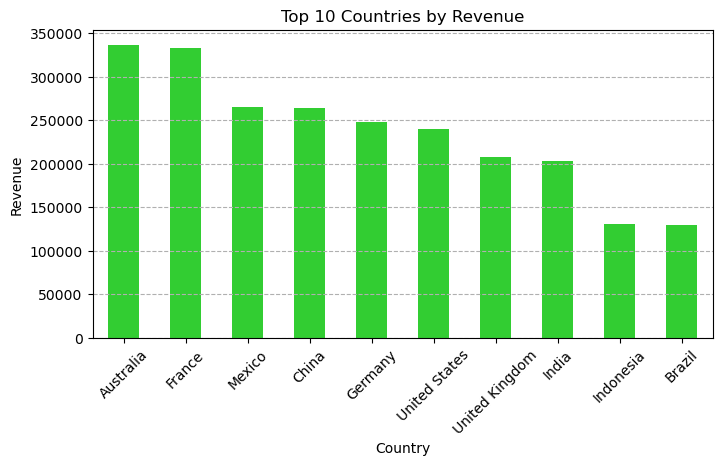

In [13]:
top_countries = df2.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)

top_countries.plot(kind='bar', title='Top 10 Countries by Revenue', color='limegreen', figsize=(8,4))
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

#### **Top 3 Profitable Markets**

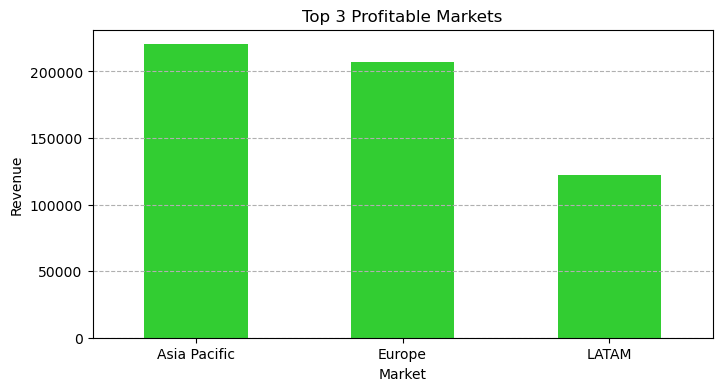

In [14]:
top_markets = df2.groupby('Market')['Profit'].sum().sort_values(ascending=False).head(3)

top_markets.plot(kind='bar', title='Top 3 Profitable Markets', color='limegreen', figsize=(8,4))
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

#### **Top 10 Subcategories for Profit Ratio (Profit / Sales)**

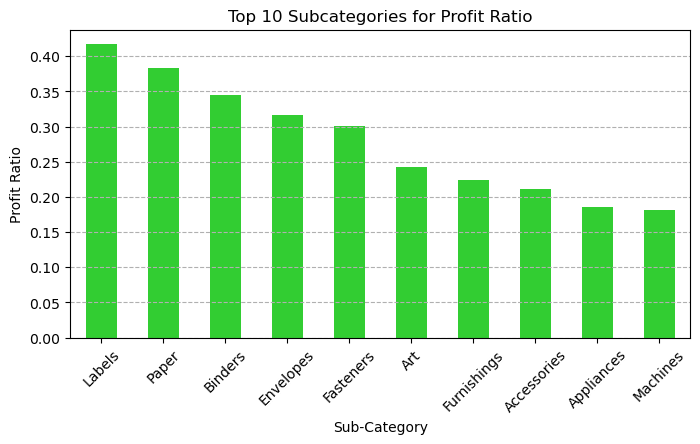

In [15]:
df2['Profit_Ratio'] = df2['Profit']/df2['Sales']

top_10_subCat_pr = df2.groupby('Sub-Category')['Profit_Ratio'].mean().sort_values(ascending=False).head(10)

top_10_subCat_pr.plot(kind='bar', title='Top 10 Subcategories for Profit Ratio', color='limegreen', figsize=(8,4))
plt.ylabel('Profit Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

#### **Bottom 5 Revenue (Sales) Generating Sub-Categories**

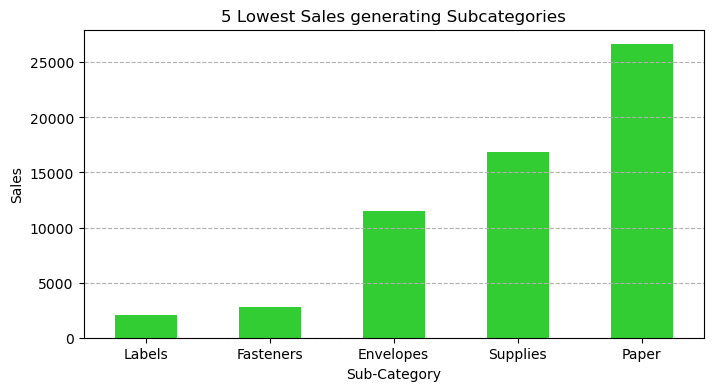

In [16]:
low_subCat_sales = df2.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True).head(5)

low_subCat_sales.plot(kind='bar', title='5 Lowest Sales generating Subcategories', color='limegreen', figsize=(8,4))
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

#### **Revenue (Sales) per E-Commerce Platform**

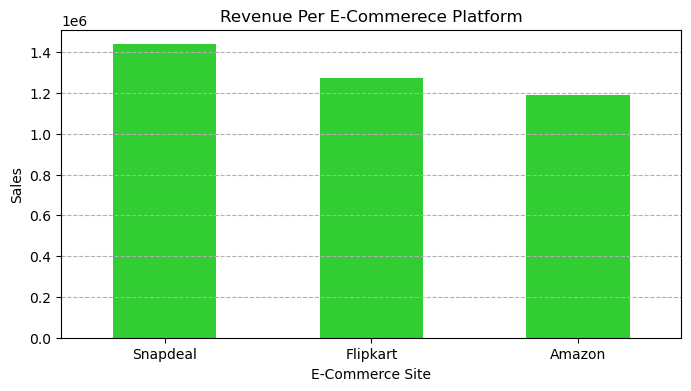

In [17]:
sales_per_platform = df2.groupby('E-Commerce Site')['Sales'].sum().sort_values(ascending=False)

sales_per_platform.plot(kind='bar', title='Revenue Per E-Commerece Platform', color='limegreen', figsize=(8,4))
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

#### **Order Priority-wise Quantity**

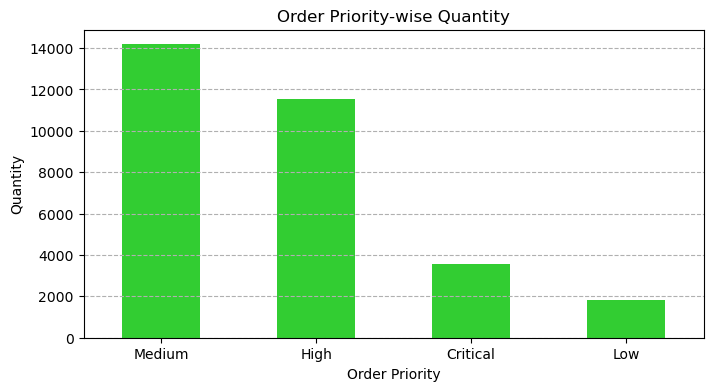

In [18]:
priority_quantity = df2.groupby('Order Priority')['Quantity'].sum().sort_values(ascending=False)
priority_quantity.plot(kind='bar', title='Order Priority-wise Quantity', color='limegreen', figsize=(8,4))
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

#### **Revenue (Sales) Growth per Year**

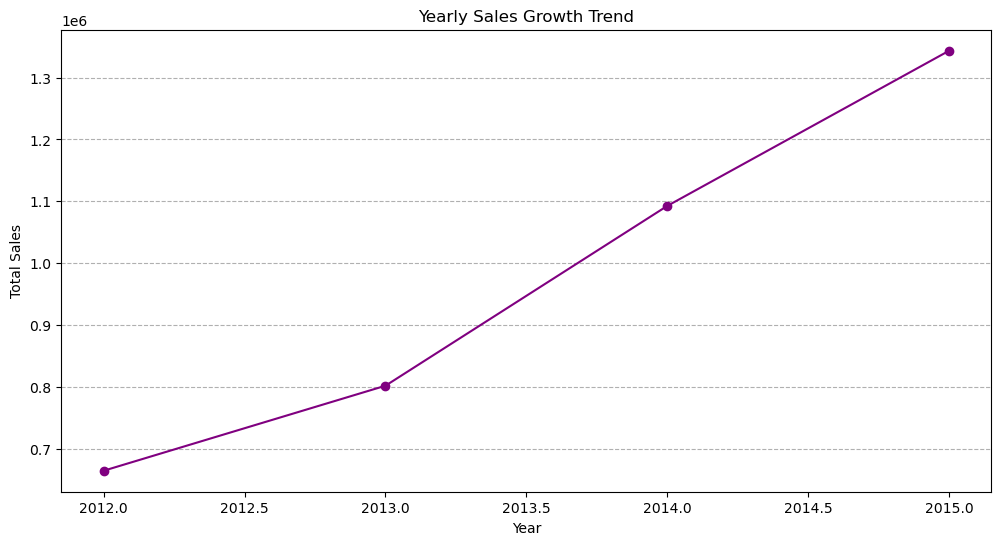

In [19]:
df2['Order Year'] = pd.to_datetime(df2['Order Date']).dt.year 

sales_growth_per_year = df2.groupby('Order Year')['Sales'].sum()

sales_growth_per_year.plot(kind='line', marker='o', color='purple', title='Yearly Sales Growth Trend', figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--')
plt.show()

#### **Total Revenue (Sales)**

In [20]:
total_revenue = df2['Sales'].sum()
total_revenue

3902318.9045

#### **Total Profit**

In [21]:
total_revenue = df2['Profit'].sum()
total_revenue

647428.9825

#### **Number of Products Sold per Year**

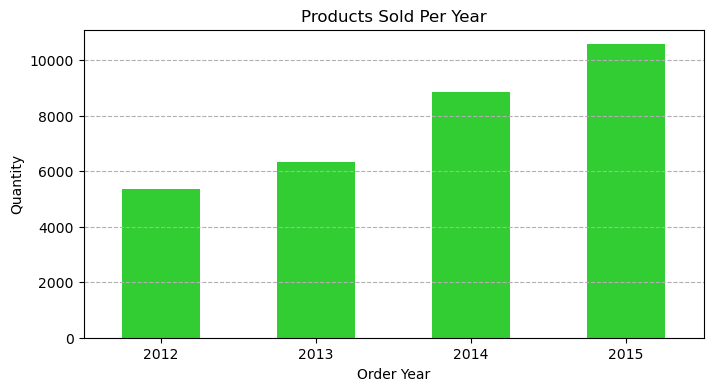

In [22]:
products_sold_per_year = df2.groupby('Order Year')['Quantity'].sum()
products_sold_per_year.plot(kind='bar', title='Products Sold Per Year', color='limegreen', figsize=(8,4))
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()